In [37]:
library(lme4)
library(effects)
library(ggplot2)
library(ggpubr)
library(tidyr)

#lmer() control: sets errors to warnings, increases iterations (maxfun).  
turn_off <- lmerControl(optimizer="bobyqa", # Nelder_Mead, bobyqa is the default 
  optCtrl = list(maxfun = 2e5), # Increase the number of iterations: helps convergence
  check.nobs.vs.nlev = "warning",
  check.nobs.vs.rankZ = "warning",
  check.nlev.gtreq.5 = "warning", 
  check.nobs.vs.nRE = "warning",
  check.rankX = c("ignore"),
  check.scaleX = "warning",
  check.formula.LHS = "warning",
  check.conv.grad   = .makeCC("warning", tol = 1e-3, relTol = NULL))


Attaching package: ‘tidyr’

The following object is masked from ‘package:magrittr’:

    extract

The following object is masked from ‘package:Matrix’:

    expand



In [126]:
read.csv("ssrt_fslmeants.csv") -> ssrt_fslmeants
head(ssrt_fslmeants)

participant,run,frameRate,meanSSD,median,SSRT,SSRT_demeaned,roi,zstat,scanID
1,1,60,0.2529412,0.5365594,283.6182,-3.692167,0,1.442300,run-01_sub-001_task-SST
1,1,60,0.2529412,0.5365594,283.6182,-3.692167,1,1.018385,run-01_sub-001_task-SST
1,1,60,0.2529412,0.5365594,283.6182,-3.692167,2,1.550880,run-01_sub-001_task-SST
1,1,60,0.2529412,0.5365594,283.6182,-3.692167,3,1.024605,run-01_sub-001_task-SST
1,1,60,0.2529412,0.5365594,283.6182,-3.692167,4,1.035356,run-01_sub-001_task-SST
1,1,60,0.2529412,0.5365594,283.6182,-3.692167,5,0.490787,run-01_sub-001_task-SST


In [127]:
ssrt_fslmeants$roi <- as.factor(ssrt_fslmeants$roi)
ssrt_fslmeants$run <- as.factor(ssrt_fslmeants$run)

SSRT ~ zstat + run + (1 | participant)

In [128]:
# run lme model for each roi separately
ef_list = list()
ef_list

for (i in 1:10) {
df <- ssrt_fslmeants[ssrt_fslmeants$roi==rois[i],]
lmer <- lmer(SSRT ~ zstat + run + (1 | participant), data = df, control = turn_off)
summary(lmer) 
    
    ef <- as.data.frame(effect("zstat", lmer))
 
    ef_list[[i]] <- ef # add it to your list

}

list()

In [129]:
write.csv(do.call(rbind, ef_list), file = 'ef_list.csv', row.names = FALSE)


In [132]:
ef_list <- read.csv("ef_list.csv")

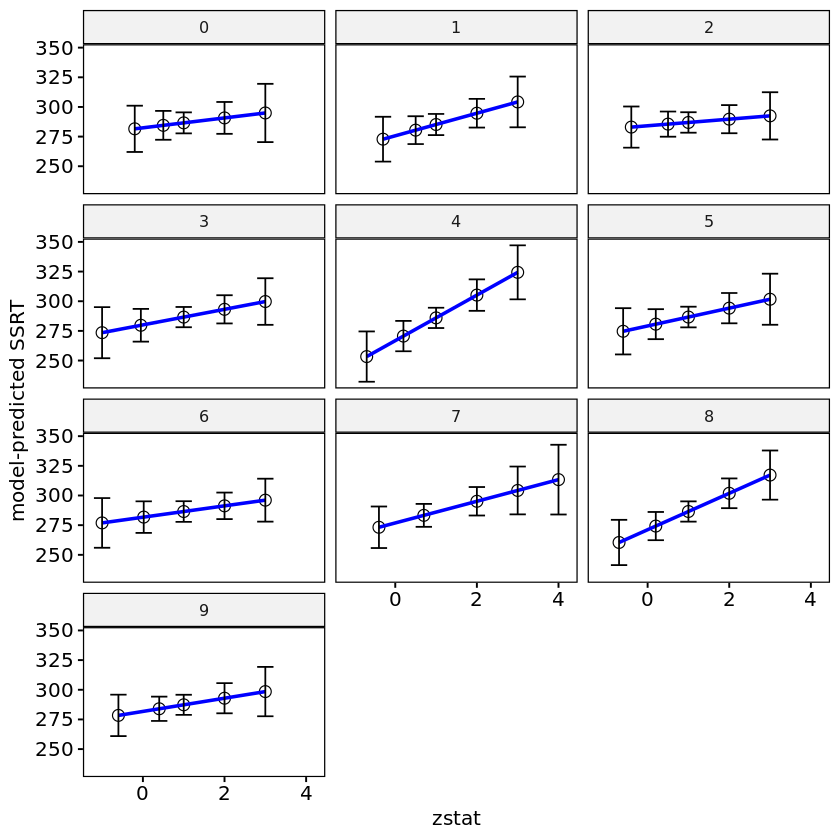

In [134]:
ggscatter(as.data.frame(ef_list), x = "zstat", y = "fit", 
          add = "reg.line", 
          facet.by = 'roi',
          ncol = 3,
          color = "black", shape = 21, size = 3,
          add.params = list(color = "blue", fill = "lightgray")) + geom_errorbar(aes(ymin=fit-se, ymax=fit+se), width=0.4, position=position_dodge(width=0.9)) + labs(y="model-predicted SSRT") 
